# Assignment 1-A : Regression without regularization

### Loading the Data and Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
df = pd.read_csv("./Data - A1.csv")

In [3]:
df

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955
...,...,...
995,0.671672,3.079356
996,-0.615616,0.027487
997,0.259259,1.068320
998,0.119119,0.245188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
 1   Y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
df.describe()

,X,Y
count,1.000000e+03,1000.000000
mean,-4.440892e-18,0.954743
std,5.782171e-01,1.809135
min,-1.000000e+00,-5.091491
25%,-5.000000e-01,-0.106178
50%,5.009014e-17,0.912120
75%,5.000000e-01,1.967479
max,1.000000e+00,6.559203


In [6]:
df['X'].value_counts().describe() # No NaN values

count    1000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: count, dtype: float64

In [7]:
df['Y'].value_counts().describe() # No NaN values

count    1000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: count, dtype: float64

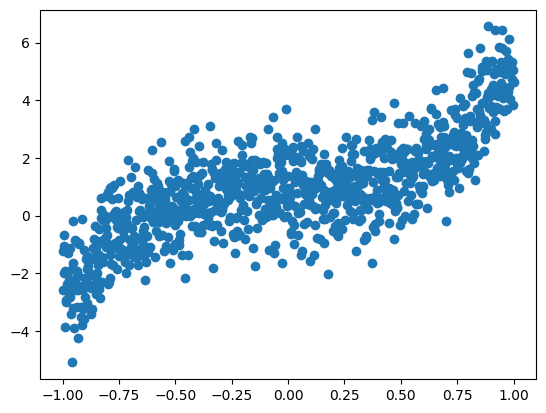

In [8]:
plt.scatter(df['X'], df['Y'])

#### Making The Polynomial Feature Matrix Phi

In [9]:
def powerColumns(data , power):
    lis = []
    lis1 = data["X"]
    for i in lis1:
        lis.append(i**power)
    return lis    

In [10]:
for i in range(2,10):
    name = "X^" + str(i) 
    df.insert(i-1,name,powerColumns(df , i),True)

In [11]:
df

,X,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,Y
0,0.987988,0.976120,0.964395,0.952811,0.941366,0.930058,9.188860e-01,9.078484e-01,8.969433e-01,5.098368
1,0.719720,0.517996,0.372812,0.268320,0.193115,0.138989,1.000331e-01,7.199581e-02,5.181680e-02,2.516654
2,-0.403403,0.162734,-0.065648,0.026482,-0.010683,0.004310,-1.738509e-03,7.013204e-04,-2.829150e-04,0.337961
3,0.107107,0.011472,0.001229,0.000132,0.000014,0.000002,1.617067e-07,1.731994e-08,1.855088e-09,0.737320
4,0.345345,0.119263,0.041187,0.014224,0.004912,0.001696,5.858349e-04,2.023154e-04,6.986867e-05,-0.780955
...,...,...,...,...,...,...,...,...,...,...
995,0.671672,0.451143,0.303020,0.203530,0.136705,0.091821,6.167359e-02,4.142440e-02,2.782360e-02,3.079356
996,-0.615616,0.378983,-0.233308,0.143628,-0.088420,0.054432,-3.350946e-02,2.062895e-02,-1.269950e-02,0.027487
997,0.259259,0.067215,0.017426,0.004518,0.001171,0.000304,7.872994e-05,2.041147e-05,5.291862e-06,1.068320
998,0.119119,0.014189,0.001690,0.000201,0.000024,0.000003,3.403066e-07,4.053702e-08,4.828734e-09,0.245188


In [12]:
X1 = df[df.columns[0:-1]]
X1

,X,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9
0,0.987988,0.976120,0.964395,0.952811,0.941366,0.930058,9.188860e-01,9.078484e-01,8.969433e-01
1,0.719720,0.517996,0.372812,0.268320,0.193115,0.138989,1.000331e-01,7.199581e-02,5.181680e-02
2,-0.403403,0.162734,-0.065648,0.026482,-0.010683,0.004310,-1.738509e-03,7.013204e-04,-2.829150e-04
3,0.107107,0.011472,0.001229,0.000132,0.000014,0.000002,1.617067e-07,1.731994e-08,1.855088e-09
4,0.345345,0.119263,0.041187,0.014224,0.004912,0.001696,5.858349e-04,2.023154e-04,6.986867e-05
...,...,...,...,...,...,...,...,...,...
995,0.671672,0.451143,0.303020,0.203530,0.136705,0.091821,6.167359e-02,4.142440e-02,2.782360e-02
996,-0.615616,0.378983,-0.233308,0.143628,-0.088420,0.054432,-3.350946e-02,2.062895e-02,-1.269950e-02
997,0.259259,0.067215,0.017426,0.004518,0.001171,0.000304,7.872994e-05,2.041147e-05,5.291862e-06
998,0.119119,0.014189,0.001690,0.000201,0.000024,0.000003,3.403066e-07,4.053702e-08,4.828734e-09


In [13]:
X1.describe()

,X,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-4.440892e-18,0.334001,-7.993606e-18,2.008013e-01,-1.243450e-17,1.437163e-01,-9.325873e-18,1.120027e-01,-1.021405e-17
std,5.782171e-01,0.298888,3.792890e-01,2.678680e-01,3.031723e-01,2.392761e-01,2.601391e-01,2.174229e-01,2.316001e-01
min,-1.000000e+00,0.000001,-1.000000e+00,1.004010e-12,-1.000000e+00,1.006021e-18,-1.000000e+00,1.008036e-24,-1.000000e+00
25%,-5.000000e-01,0.062877,-1.250011e-01,3.953666e-03,-3.125094e-02,2.486170e-04,-7.812995e-03,1.563443e-05,-1.953337e-03
50%,5.009014e-17,0.250502,1.503401e-22,6.275213e-02,2.508578e-28,1.572002e-02,3.520841e-34,3.938082e-03,4.536171e-40
75%,5.000000e-01,0.562876,1.250011e-01,3.168313e-01,3.125094e-02,1.783387e-01,7.812995e-03,1.003842e-01,1.953337e-03
max,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Normalizing the Data

In [14]:
def func(col):
  return ((col - col.mean()) / col.std())

In [15]:
for col in X1.columns:
  X1[col] = func(X1[col])

C:\Users\agarw\AppData\Local\Temp\ipykernel_9048\1258981741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[col] = func(X1[col])


In [16]:
X1.describe()

,X,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.421085e-17,9.681145e-17,-1.243450e-17,-2.664535e-17,4.440892e-18,-3.907985e-17,-1.065814e-17,6.927792e-17,-1.776357e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729454e+00,-1.117473e+00,-2.636512e+00,-7.496280e-01,-3.298455e+00,-6.006296e-01,-3.844097e+00,-5.151374e-01,-4.317788e+00
25%,-8.647271e-01,-9.071080e-01,-3.295670e-01,-7.348683e-01,-1.030798e-01,-5.995905e-01,-3.003391e-02,-5.150655e-01,-8.434097e-03
50%,9.389191e-17,-2.793649e-01,2.107563e-17,-5.153629e-01,4.101463e-17,-5.349313e-01,3.584957e-17,-4.970249e-01,4.410211e-17
75%,8.647271e-01,7.657560e-01,3.295670e-01,4.331610e-01,1.030798e-01,1.446965e-01,3.003391e-02,-5.343708e-02,8.434097e-03
max,1.729454e+00,2.228255e+00,2.636512e+00,2.983554e+00,3.298455e+00,3.578643e+00,3.844097e+00,4.084194e+00,4.317788e+00


<Axes: >

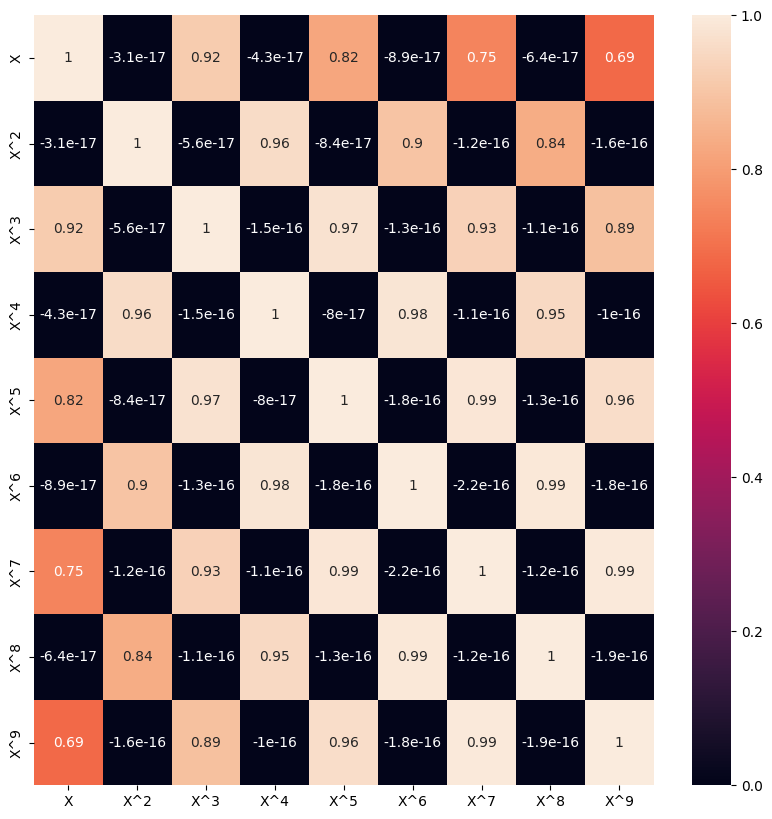

In [17]:
''' 
Visulaizing the correlation between the features using the COvariance Matrix to see how the features are related to each other
'''

plt.figure(figsize=(10,10))
sns.heatmap(X1.corr(), annot=True)

In [18]:
Y1 = df["Y"]
Y1

0      5.098368
1      2.516654
2      0.337961
3      0.737320
4     -0.780955
         ...   
995    3.079356
996    0.027487
997    1.068320
998    0.245188
999    0.545114
Name: Y, Length: 1000, dtype: float64

In [19]:
X1.shape , Y1.shape

((1000, 9), (1000,))

In [20]:
type(X1),type(Y1)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### Polynomial Regression

In [21]:
def predict_Y( bias ,weights , features):
  return bias + np.dot(features, weights)

In [22]:
X = X1.to_numpy()
Y = Y1.to_numpy()

In [23]:
X.shape , Y.shape

((1000, 9), (1000,))

#### Splitting that Data into training and testing sets

In [24]:
def custom_train_test_split(X, y, test_size, random_state):
    if random_state is not None:
        random.seed(random_state)
    num_samples = len(X)
    num_test = int(test_size * num_samples)
    indices = list(range(num_samples))
    random.shuffle(indices)
    test_indices = indices[:num_test]
    train_indices = indices[num_test:]
    X_train = [X[i] for i in train_indices]
    Y_train = [y[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    Y_test = [y[i] for i in test_indices]
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)
    return X_train, X_test, Y_train, Y_test

In [25]:
X_train , X_test , Y_train , Y_test = custom_train_test_split(X,Y,test_size=0.2,random_state=40)

#### Batch Gradient Descent

In [26]:
import math
def get_cost(Y,Y_hat):

  n = len(Y)
  sum = 0
  for i in range(n):
    sum += (Y[i] - Y_hat[i])**2

  sum /= (2*n)
  return sum


In [27]:
def update_theta(x , y , y_hat , b_0 , theta_o , learning_rate):
  grad_b = (np.sum(y_hat-y))/len(y)
  grad_w = (np.dot((y_hat-y),x))/len(y)
  b_1 = b_0 - learning_rate*grad_b
  theta_1 = theta_o - learning_rate*grad_w
  return b_1 , theta_1

In [28]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((800, 9), (800,), (200, 9), (200,))

In [29]:
def run_gradient_descent(X,Y,alpha,num_iterations):
  b=random.random()
  theta=np.random.rand(X.shape[1])
  J = []
  for each_iter in range(num_iterations):

    Y_hat = predict_Y(b,theta,X)
    prev_b = b
    prev_theta = theta
    b,theta = update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
    J.append(get_cost(Y,Y_hat))
  print("Final Estimate of b and theta : ",b,theta)
  return b,theta,J


#### Evaluation and Inference

Final Estimate of b and theta :  0.9732380618518013 [1.3534004]
0.6040602750312645
Final Estimate of b and theta :  0.9792973212562031 [1.34848701 0.10060235]
0.6049575797031088
Final Estimate of b and theta :  0.9732464357787649 [0.51990333 0.09640534 0.95264021]
0.7281196098354531
Final Estimate of b and theta :  0.9769838755688697 [ 0.27484811  0.40006831  1.19668548 -0.30309591]
0.7411435926997689
Final Estimate of b and theta :  0.9801106159310277 [ 0.49682933  0.34449672  0.31130474 -0.24759584  0.7101689 ]
0.7458617659054654
Final Estimate of b and theta :  0.9782663242068145 [ 0.33598189  0.10304175  0.57782013  0.20224843  0.59140786 -0.20996987]
0.7522422694470051
Final Estimate of b and theta :  0.9753396209270102 [ 0.57668281  0.30499264  0.16308959 -0.21503556  0.36732969  0.01552588
  0.43087369]
0.744758331494678
Final Estimate of b and theta :  0.9743760280090729 [ 0.45700472  0.25170552  0.20465227 -0.17297305  0.59967929 -0.04452359
  0.26061266  0.0767245 ]
0.7493471

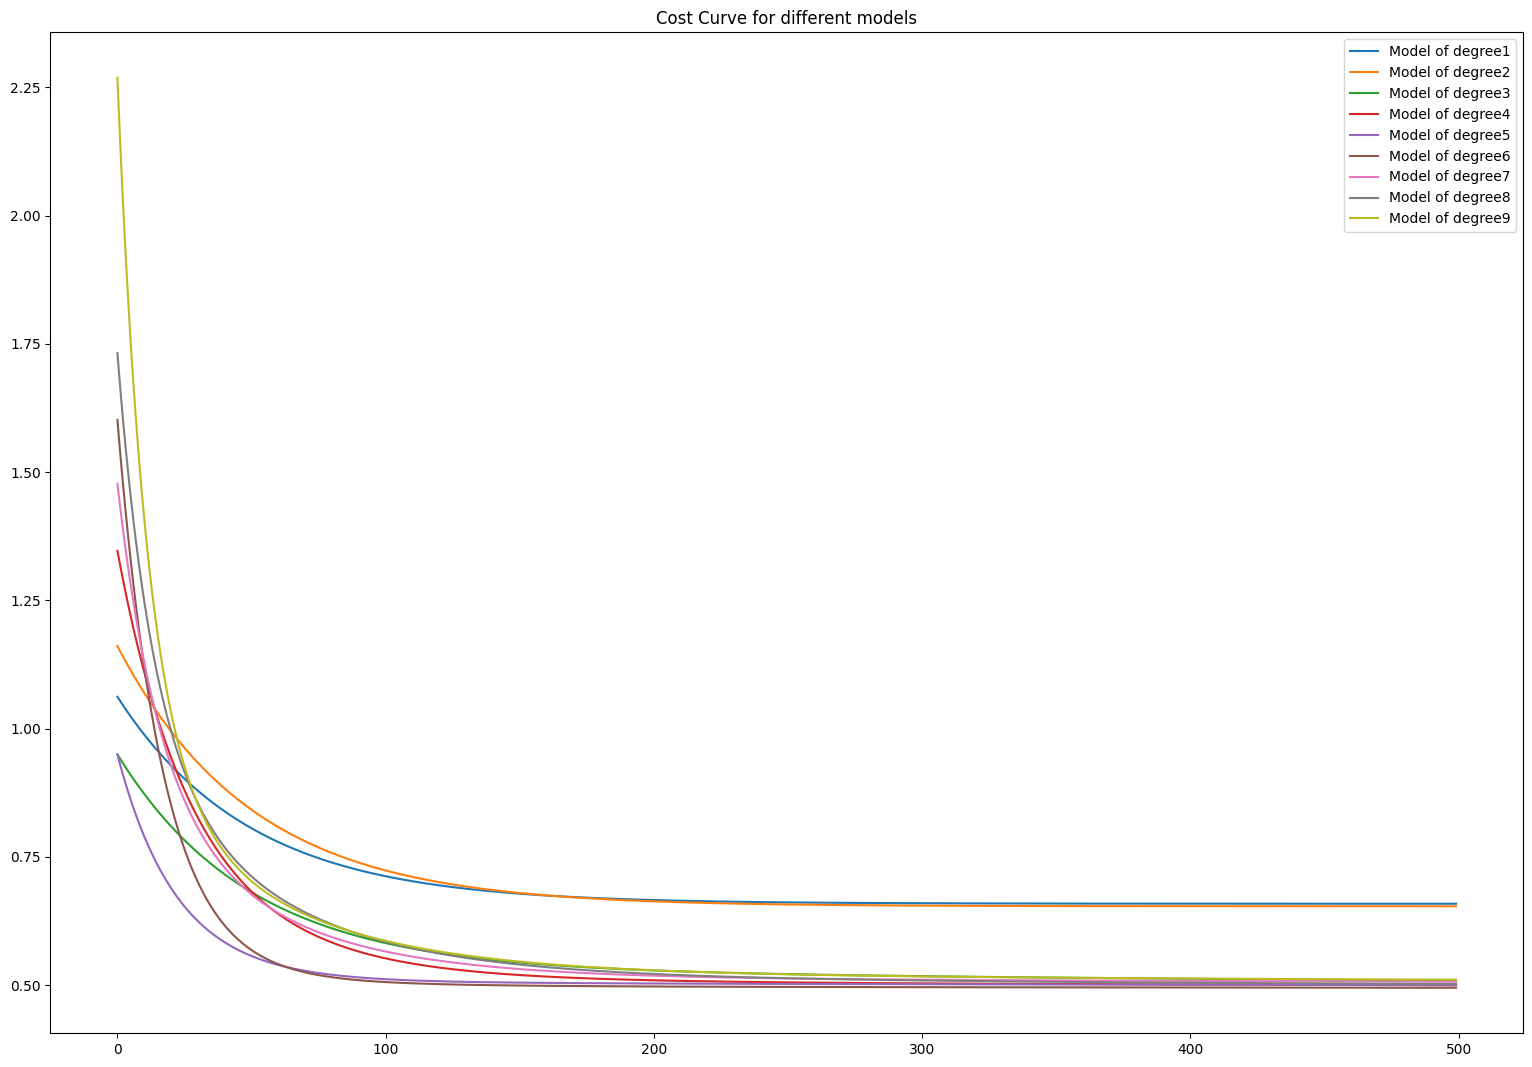

In [35]:
best_b = None
best_theta = None
best_r2_score = 0
train_errors = []
test_errors = []
r2_scores = []
from sklearn.metrics import r2_score
plt.figure(figsize=(19,13))

for i in range(1 , 10):
    
    Xi_train = X_train[:,:i]
    Xi_test = X_test[:,:i]
    
    b,theta,cost_curve=run_gradient_descent(Xi_train , Y_train , alpha=0.01 , num_iterations=500)
    y_train_pred = predict_Y(b , theta , Xi_train)
    y_test_pred = predict_Y(b , theta , Xi_test)
    train_errors.append(get_cost(Y_train , y_train_pred))
    test_errors.append(get_cost(Y_test , y_test_pred))
    r2 = r2_score(Y_test , predict_Y(b , theta , Xi_test))
    if r2 > best_r2_score:
        best_r2_score = r2
        best_b = b
        best_theta = theta
    r2_scores.append(r2_score(Y_test , predict_Y(b , theta , Xi_test)))
    plt.plot(cost_curve , label = "Model of degree" + str(i))
    print(r2_score(Y_test , predict_Y(b , theta , Xi_test)))
plt.title("Cost Curve for different models")
plt.legend()
print('\n')
print(f'Minimum Cost Function Value: {min(cost_curve)}')

Text(0.5, 1.0, 'Train and Test Errors vs Degree of Polynomial')

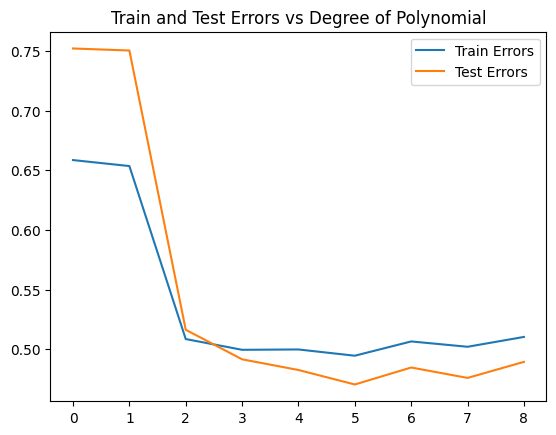

In [36]:
plt.plot(train_errors , label = "Train Errors")
plt.plot(test_errors , label = "Test Errors")
plt.legend()
plt.title("Train and Test Errors vs Degree of Polynomial")

In [37]:
best_b , best_theta
degree = best_theta.shape[0]
best_theta = best_theta.reshape(degree , 1)


Text(0.5, 1.0, 'The best polynomial fitted curve on the data points')

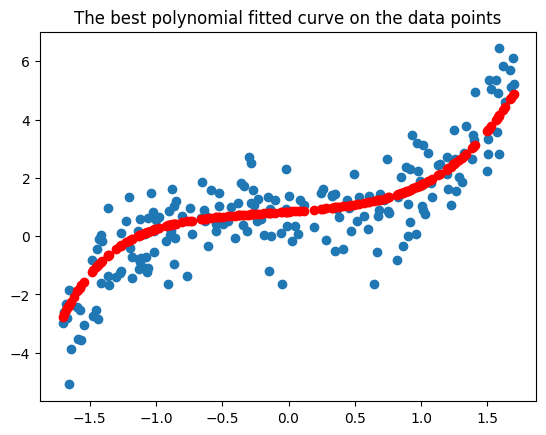

In [38]:
plt.scatter(X_test[:,0] , Y_test)
plt.scatter(X_test[:,0] , predict_Y(best_b , best_theta , Xi_test[:,:degree]) , color = 'red')
plt.title("The best polynomial fitted curve on the data points")

#### Comparing the Results of all the Models
From sklearn.metrics , r2_score has been used to validate and observe the performance of all the models of all the degrees

<li>Final Estimate of b and theta :  0.9732380618518013 [1.3534004]
0.6040602750312645
<li>Final Estimate of b and theta : 0.9792973212562031 [1.34848701 0.10060235]
0.6049575797031088
<li>Final Estimate of b and theta :  0.9732464357787649 [0.51990333 0.09640534 0.95264021] 0.7281196098354531
<li>Final Estimate of b and theta : 0.9769838755688697 [ 0.27484811  0.40006831  1.19668548 -0.30309591]
0.7411435926997689
<li>Final Estimate of b and theta : 0.9801106159310277 [ 0.49682933  0.34449672  0.31130474 -0.24759584  0.7101689 ]
0.7458617659054654
<li>Final Estimate of b and theta :  0.9782663242068145 [ 0.33598189  0.10304175  0.57782013  0.20224843  0.59140786 -0.20996987]
0.7522422694470051
<li>Final Estimate of b and theta : 0.9753396209270102 [ 0.57668281  0.30499264  0.16308959 -0.21503556  0.36732969  0.01552588
  0.43087369]
<li>Final Estimate of b and theta : 0.9743760280090729 [ 0.45700472  0.25170552  0.20465227 -0.17297305  0.59967929 -0.04452359
  0.26061266  0.0767245 ]
<li>Final Estimate of b and theta :   0.9725139996423853 [ 0.70606047  0.04427592 -0.08581005 -0.09144557  0.40650418  0.22832388
  0.4975032  -0.08293493  0.02188101]
0.7422708442618553

<br>
Minimum Cost Function Value: 0.5104047476828873
 


# Final Conclusion

We are choosing the degree of the polynomial to be 6 because of its highest R2 score. The R2 score is defined below.

(R2 score: The R-squared (R2) score, also known as the coefficient of determination, is a statistical measure that assesses a regression model's goodness of fit. It quantifies the fraction of the variance in the dependent variable explained by the model's independent variables. In other words, it assesses how effectively the model's independent variables account for the variability in the dependent variable.

Text(0.5, 1.0, 'R2 Score vs Degree of Polynomial')

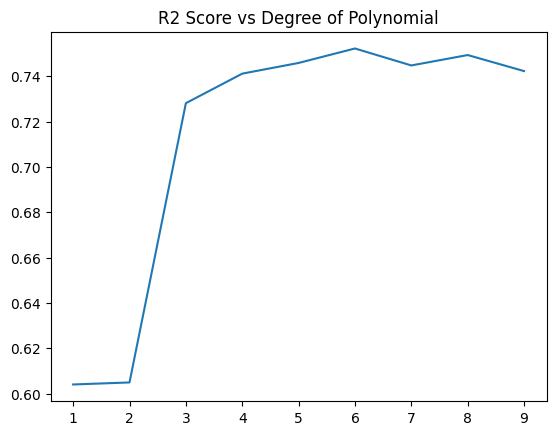

In [42]:
plt.plot( np.arange(1,10) , r2_scores)
plt.title("R2 Score vs Degree of Polynomial")

# Inference

R2 score is pretty low in the beginning because of underfit in the data, rendering the model useless.

As we increase the degree of the model, our R2 score increases and peaks at a reasonable degree = 6.